<font size=6>B13 setup - PLE scan</font>

In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from LowLevelModules.NIdaqAPD import *

from LowLevelModules.GeneralFunctions import *
from LowLevelModules.bristol_wavelength_meter_client import *
from LowLevelModules.EFW_filter import *
from LowLevelModules.NIdaq import *
from LowLevelModules.Instruments import DG645
from LowLevelModules.NIdaqAPD import APDCounter

from collections import deque

import visa
from pyvisa import util

import nidaqmx
import numpy as np
import time

from skimage import data
from skimage.feature import match_template
from scipy.optimize import curve_fit
# http://scipy.github.io/old-wiki/pages/Cookbook/FittingData
from scipy import optimize

from pymeasure.instruments.thorlabs import ThorlabsPM100USB

import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline

from LowLevelModules.NIdaq import *
from LowLevelModules.NIdaqAPD import *
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.Confocal import *

import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

from scipy.misc import electrocardiogram
from scipy.signal import chirp, find_peaks, peak_widths

In [3]:
from LowLevelModules.Spectroscopy import Spectrum
from LowLevelModules.GeneralFunctions import LivePlot2D, prettify_2d_plot
from LowLevelModules.LightField import LightField

In [4]:
import PrincetonInstruments.LightField.AddIns as AddIns
from PrincetonInstruments.LightField.Automation import Automation
from PrincetonInstruments.LightField.AddIns import CameraSettings
from PrincetonInstruments.LightField.AddIns import DeviceType
from PrincetonInstruments.LightField.AddIns import ExperimentSettings

In [5]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl


# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [6]:
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [7]:
DG645_address = 'GPIB0::15::INSTR'

bristolCOM = 7

scan_terminal = '/Dev2/ao1' # laser scan

DG_trig_terminal = '/Dev2/port1/line3'

shutter_ctrl_terminal ='/Dev1/port0/line1'

APD_terminal = '/Dev1/PFI3'
APD_ctr = '/Dev1/ctr2' # APD counter

In [8]:
# initialize the FSM object
FSM1 = FSM(setup='B13_50x')

In [9]:
FSM1.read_position('micron')

(-1.313474285392108, -3.1886090968337375)

In [ ]:
%matplotlib notebook

ts = time.time()
xcen,ycen = FSM1.read_position('microns')
a,b,c=FSM1.scan_2D(-1.02,3.74,10,10,60,60,scan_rate=200)
ttot = time.time()-ts
print(f'Total scan time (s) = {ttot:.3f}')

<IPython.core.display.Javascript object>


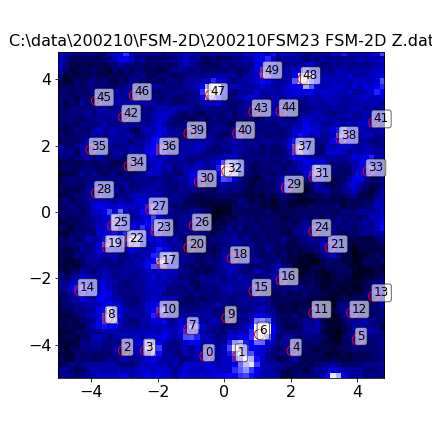

In [124]:
# load image and track particles
f=load_and_track(r'C:\data\200210\FSM-2D','200210FSM23 FSM-2D','.dat');

In [128]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep
0,-4.343646,-0.577611,57.402667,0.885144,0.260383,12.428863,57.64,NaN
1,-4.343486,0.407333,72.058667,0.881289,0.275995,16.092863,72.30,NaN
2,-4.174349,-3.035181,52.876549,0.883115,0.306620,11.638588,53.04,NaN
3,-4.178899,-2.371972,69.903373,0.885535,0.252949,15.087059,70.10,NaN
4,-4.180362,2.045878,53.235765,0.892312,0.235593,10.848314,53.40,NaN
5,-3.848862,4.012265,53.594980,0.884783,0.263699,11.638588,53.72,NaN
6,-3.686546,1.065509,83.840941,0.884020,0.259868,18.320000,84.00,NaN
7,-3.526129,-1.063922,65.449098,0.884058,0.301966,14.296784,65.68,NaN
8,-3.196301,-3.524886,71.914980,0.887813,0.239544,15.230745,72.04,NaN
9,-3.196078,0.082793,48.853333,0.883675,0.282486,10.704627,49.00,NaN


# Load Spectrometer

In [12]:
# Initialize LightField --> make sure LF is closed before starting this initialization
ts = time.time()
LFauto = LightField()
ttot = time.time()-ts
print(f'Total scan time (s) = {ttot:.3f}')

Lightfield startup and setup OK
Total scan time (s) = 43.555


In [13]:
# setup spectrometer
wdir = r'Z:\Projects\Diamond NV centers\NV spectrometer\20200210'
base_name = 'SiV_533A_V1'
acq_time = 15
save_data = True

#deal with LightField settings
LFauto.set_acquisition_time(acq_time)
LFauto.set_path(wdir)
LFauto.set_filename(base_name)
LFauto.set_filename_increment()

# Fine tune spectrometer settings

In [ ]:
# LFauto.set_value(CameraSettings.ShutterTimingMode,"Normal")
# LFauto.set_acquisition_time(0.4)

# LFauto.set_value(ExperimentSettings.FileNameGenerationIncrementNumber,61)

In [ ]:
# # take data continuously
# LFauto.set_filename_increment(True)
# LFauto.set_acquisition_time(5)
# LFauto.set_value(CameraSettings.ShutterTimingMode,"AlwaysOpen")
# while True:
#     try:
#         LFauto.acquire()
#     except:
# #         LFauto.set_value(CameraSettings.ShutterTimingMode,"Normal")
#         break

# Go to positions successively and take spectrum

<IPython.core.display.Javascript object>


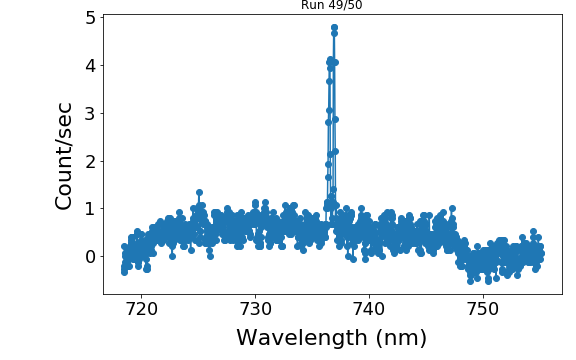

current run 0
current run 1
current run 2
current run 3
current run 4
current run 5
current run 6
current run 7
current run 8
current run 9
current run 10
current run 11
current run 12
current run 13
current run 14
current run 15
current run 16
current run 17
current run 18
current run 19
current run 20
current run 21
current run 22
current run 23
current run 24
current run 25
current run 26
current run 27
current run 28
current run 29
current run 30
current run 31
current run 32
current run 33
current run 34
current run 35
current run 36
current run 37
current run 38
current run 39
current run 40
current run 41
current run 42
current run 43
current run 44
current run 45
current run 46
current run 47
current run 48
current run 49


In [127]:
lp = LivePlot(subpl=1,x_ext=8, y_ext=5, mk='o', xlabel='Wavelength (nm)', ylabel='Count/sec')
LFauto.set_acquisition_time(15)

alist =  np.empty(1)

for i in np.array(list(range(f.shape[0]))):
    
    thisx,thisy = (f.iloc[i].x,f.iloc[i].y)
    FSM1.go_to_position(thisx,thisy)
    fname = "SiV_533A_V2 " + str(i).zfill(2)
    LFauto.set_filename(fname)
    LFauto.acquire()
    data_ref = LFauto.load_acquired_data(wdir, fname)
    lp.plot_live(data_ref.x,data_ref.y,title1 = f'Run {i}/{f.shape[0]}')
    
    peaks,properties=find_peaks(data_ref.y, prominence=1.2,distance=5)
    results_half = peak_widths(data_ref.y, peaks, rel_height=0.5)
    alist= np.append(alist,data_ref.x[peaks])

    print(f'current run {i}')
    print(data_ref.x[peaks])

# Track SiV 

<IPython.core.display.Javascript object>


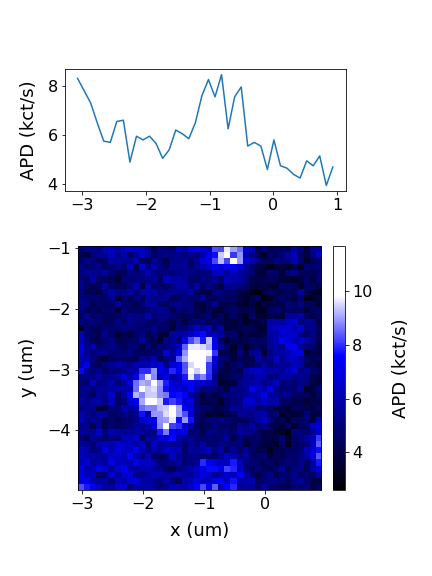

<IPython.core.display.Javascript object>


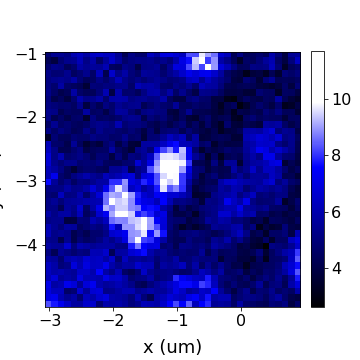

C:\data\200210\FSM-2D\FSM-2D_091832 Z.txt
Total scan time (s) = 38.021


In [38]:
# take a small scan
%matplotlib notebook

ts = time.time()
xcen,ycen = FSM1.read_position('microns')
a,b,c=FSM1.scan_2D(-1.07,-2.97,4,4,40,40,scan_rate=50)
ttot = time.time()-ts
print(f'Total scan time (s) = {ttot:.3f}')

In [39]:
templateC= c

In [ ]:
FSM1.go_to_position(-2,4.5)

In [ ]:
FSM1.track_NV_2D(templateC,4,4)

# Center SiV

In [ ]:
FSM1.go_to_position(-0.61,-2.44)
FSM1.center_NV_2D()

# Optimize focus 

In [10]:
obj_stage=XPS_stage()

In [31]:
print(f'Stage position (mm) = {obj_stage.stage_for_scan.read_position()}')

Stage position (mm) = -4.487655


<IPython.core.display.Javascript object>


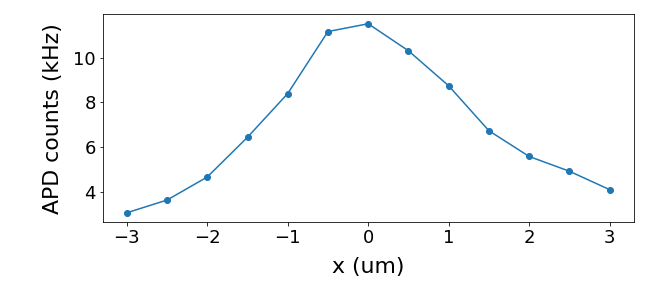

Optimized from fit
Amplitude is 10.22588726651168
Center is 0.04784365582876498
FWHM is 7.285375 um
Background is 1.384532851080085
Position before scan:  -4.48765
Position after scan:  -4.486725


<IPython.core.display.Javascript object>


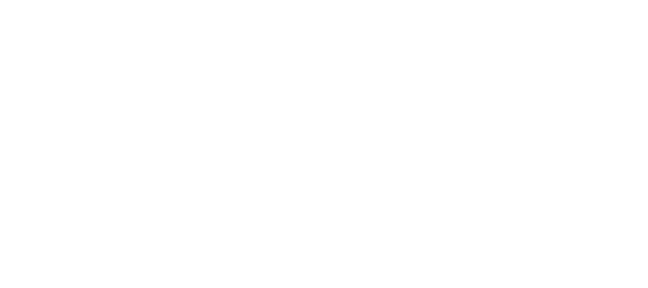

In [32]:
%matplotlib notebook
obj_stage.center_NV_depth(scan_extent=3,step_size=0.5)

# Toptica

In [12]:
def shutter_ctrl_write(v):
    """write a digital signal to shutter
    maximum frequency of operation - 10 Hz (continuous)
    40 Hz - burst - 4 sec maximum with 1 minute minimum between burst
    """
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(shutter_ctrl_terminal)
        do_task.write(v)      

def DG_trig_write_pulse():
    """generate a digital pulse of width around 1-3 ms depends on latency"""
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(DG_trig_terminal)
        do_task.write(True)
        do_task.write(False)
        
def DG_trig_write(b):
    """write a single bit (True/False) """
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(DG_trig_terminal)
        do_task.write(b)

In [10]:
# https://stackoverflow.com/questions/19547084/can-i-explicitly-close-a-ctypes-cdll
# windll.kernel32.FreeLibrary(bristol521handle)
# does not seem to actually close the handle

In [9]:
# shutter_ctrl_write(True)

# EFW filter wheel

In [13]:
efw_instance = EFW() # run once only

In [14]:
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')

In [15]:
efw_instance.read_position()

4

In [16]:
efw_instance.EFW_wheel_filter['750LP']

4

# Bristol wavemeter

In [17]:
bristol = Bristol()

In [18]:
currentLambda,currentPower = bristol.readBristol()
print(f'Wavelength (nm-air) = {currentLambda: .4f}')
print(f'Bristol power (mW) = {currentPower: .3f}')

Wavelength (nm-air) =  0.0000
Bristol power (mW) =  0.000


<font size="10">Monitor wavelength</font>

In [ ]:
%matplotlib notebook
a,b,c=monitor_wavelength(bristol)

<font size="6">Scan laser piezo voltage</font>

In [30]:
help(scan_laser_piezo)

Help on function scan_laser_piezo in module LowLevelModules.Confocal:

scan_laser_piezo(bristol, PM, vstart=-5, vend=5, scanpts=50, PowerMeterOn=False, save_data=True, lasercurrent=nan, potreading=nan)
    scan laser piezo voltage and monitor wavelength and power
    scan laser frequency in discrete steps
    software timed



<IPython.core.display.Javascript object>


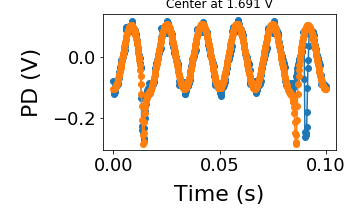

<IPython.core.display.Javascript object>


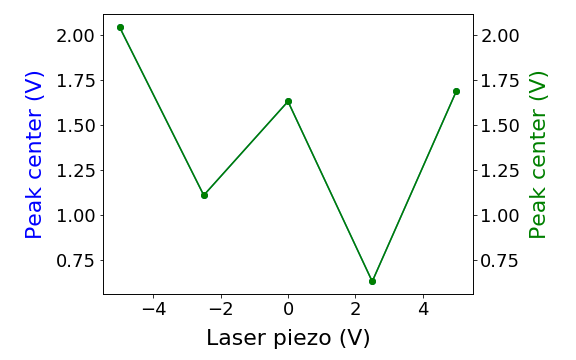

<IPython.core.display.Javascript object>


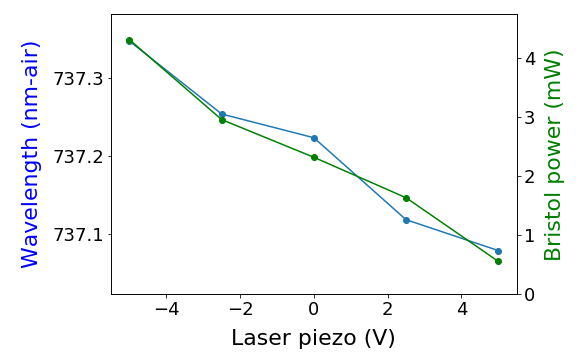

C:\data\200209\TopticaScan\TopticaScan_235132.txt


In [31]:
%matplotlib notebook
scan_laser_piezo(bristol,1,-5,5,5,False,True,61,75)

# Fit wavelength to a piecewise linear function

In [ ]:
%matplotlib notebook
directory = r'C:\data\200207\TopticaScan'
fileprefix = 'TopticaScan_124017'

fit_wavelength_segments(directory,fileprefix)

In [19]:
def pulse_wfm(t,tstart,width):
    return np.heaviside(t-tstart,0)-np.heaviside(t-tstart-width,0)

<font size=6>set DAQ counter clock output</font>

In [20]:
# setup DG645 - 637, 737, RF switch
# in us
# Note - there is about 85 ns delay from external trigger to T0 rising edge

# setup such that we use both 532 and 637 laser as excitation

time_per_point = 1 # sec 
init_time = 1e-6 # 532 nm and 637 nm, sec
PLE_time = 5e-6 # 737 nm, sec
delay637 = 0.048e-6 # sec
delay737 = 0.860e-6 # sec
delay532 = 0.620e-6 # sec

# maximum of the delay time
delay_init = max(delay637,delay532)
delay_resonance = delay737

marginFront = 0.100e-6 # allow the excitation laser to truely turn off, let the defect decays to its ground state
marginBack = 0.050e-6 # some margin at the back to avoid the initialization laser turning on in the PLE time

# AB - 532, CD - 737, EF - 637 digital modulation, GH - RF switch
# See DG645 manual p56 delay and output commmands
BNC_532 = 1 # AB
ch1_532 = 2 # A
ch2_532 = 3 # B

BNC_737 = 2 # CD
ch1_737 = 4 # C
ch2_737 = 5 # D

BNC_637 = 3 # EF
ch1_637 = 6 # E
ch2_637 = 7 # F

BNC_switch = 4 # GH
ch1_switch = 8 # G
ch2_switch = 9 # H

BNC_init = BNC_637
ch1_init = ch1_637
ch2_init = ch2_637

BNC_resonance = BNC_737
ch1_resonance = ch1_737
ch2_resonance = ch2_737

# nominal dark time for the init laser
darkTime = marginFront + PLE_time + marginBack # excitation laser off

TTL_delay_resonance = max(0, delay_init + marginFront - delay_resonance )
TTL_delay_init = max(0, delay_resonance - delay_init - marginFront)

# TTL_delay_532 = max(0, delay_resonance - delay532 - marginFront)
# TTL_delay_637 = max(0, delay_resonance - delay637 - marginFront)

TTL_delay_532 = TTL_delay_init
TTL_delay_637 = TTL_delay_init + delay_init - delay637

initMargin = 0.100e-6

cycleEndInitTime = max(initMargin, init_time - TTL_delay_init - delay_init)
cycle_time = TTL_delay_init + delay_init + darkTime + cycleEndInitTime

num_cycle = int(np.ceil(time_per_point/cycle_time)) # must be integer

In [21]:
def DG645_init():
    """
    set DG645 to burst mode
    
    """
    dg_source = DG645(DG645_address)

    # set output polarity
    dg_source.set_polarity(BNC_532,0) # negative polarity, default HIGH
    dg_source.set_polarity(BNC_637,0)
    dg_source.set_polarity(BNC_737,1) # positive polarity, default LOW
    dg_source.set_polarity(BNC_switch,1)

    # repump/initialization
    dg_source.set_delay(ch1_532,0,TTL_delay_532)
    dg_source.set_delay(ch2_532,ch1_532,darkTime)

    dg_source.set_delay(ch1_637,0,TTL_delay_637)
    dg_source.set_delay(ch2_637,ch1_637,darkTime)

    # resonance excitaiton
    dg_source.set_delay(ch1_resonance,0,TTL_delay_resonance)
    dg_source.set_delay(ch2_resonance,ch1_resonance,PLE_time)

    # collection
    dg_source.set_delay(ch1_switch,0,TTL_delay_resonance+delay_resonance)
    dg_source.set_delay(ch2_switch,ch1_switch,PLE_time)

    dg_source.set_burst_mode(1)
    dg_source.set_burst_period(cycle_time)
    dg_source.set_burst_delay(0)
    dg_source.set_burst_count(num_cycle)
    dg_source.close()
    
def DG645_default():

    dg_source = DG645(DG645_address)

    # set output polarity
    dg_source.set_polarity(BNC_532,0) # negative polarity, default HIGH
    dg_source.set_polarity(BNC_637,0)
    dg_source.set_polarity(BNC_737,0) 
    dg_source.set_polarity(BNC_switch,1) # positive polarity, default LOW
    
    dg_source.close()
        
def DG645_737_polarity(p):
    """
    turn on or off 737 laser (default state)
    0 -> negative polarity, default ON
    1 -> positive polarity, default OFF
    """
    dg_source = DG645(DG645_address)
    dg_source.set_polarity(BNC_737,p)    
    dg_source.close()
    
def DG645_set_polarity(chan,p):
    """
    turn on or off chan (channel, BNC_532, BNC_637 or BNC_737)
    0 -> negative polarity, default ON
    1 -> positive polarity, default OFF
    """
    dg_source = DG645(DG645_address)
    dg_source.set_polarity(chan,p)    
    dg_source.close()

In [22]:
print(num_cycle)
print(cycle_time)

162602
6.150000000000001e-06


In [23]:
dg_source = DG645(DG645_address)
print(dg_source.set_burst_count(10.0))
dg_source.close()

None


In [24]:
dg_source = DG645(DG645_address)
print(dg_source.get_burst_count())
dg_source.close()

162602



In [25]:
DG645_737_polarity(True)

In [26]:
DG645_init()

In [27]:
DG645_default()

In [28]:
# simulate sequence
# plot 2 cycles
plot_pts = 1000
tplot = np.linspace(0,cycle_time,plot_pts)
plt_TTL_532 = 1-pulse_wfm(tplot,TTL_delay_532,darkTime)
plt_laser_532 = 1-pulse_wfm(tplot,TTL_delay_532+delay532,darkTime)

plt_TTL_637 = 1-pulse_wfm(tplot,TTL_delay_637,darkTime)
plt_laser_637 = 1-pulse_wfm(tplot,TTL_delay_637+delay637,darkTime)

plt_TTL_resonance = pulse_wfm(tplot,TTL_delay_resonance,PLE_time)
plt_laser_resonance = pulse_wfm(tplot,TTL_delay_resonance+delay_resonance,PLE_time)

plt_rf = pulse_wfm(tplot,TTL_delay_resonance+delay_resonance,PLE_time)

# plt.plot(tplot,plt_TTL_532)
# plt.plot(tplot,plt_laser_532)
# plt.plot(tplot,plt_TTL_637)
# plt.plot(tplot,plt_laser_637)
# plt.plot(tplot,plt_TTL_resonance)
# plt.plot(tplot,plt_laser_resonance)

# plt.plot(tplot,plt_rf)

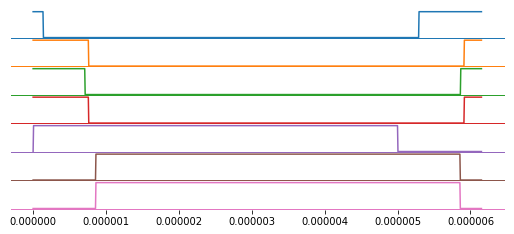

In [29]:
import seaborn as sns

segments = 7
points_per_segment = 1000

#your data preparation will vary
x = np.tile(np.linspace(0,cycle_time,plot_pts), segments)
z = np.floor(np.arange(points_per_segment * segments)/points_per_segment)
y = np.sin(x * (1 + z))

a =plt_TTL_532
b =plt_laser_532
c =plt_TTL_637
d =plt_laser_637
e =plt_TTL_resonance
f =plt_laser_resonance
g =plt_rf


y=np.concatenate((a,b,c,d,e,f,g), axis=None)

df = pd.DataFrame({'x': x, 'y': y, 'z': z})

pal = sns.color_palette()
g = sns.FacetGrid(df, row="z", hue="z", aspect=15, height=.5, palette=pal)
g.map(plt.plot, 'x', 'y')
g.map(plt.axhline, y=0, lw=1, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

In [1]:
g.fig

NameError: name 'g' is not defined

In [ ]:
# how long does it take for the toptica laser to stabilize in wavelength and power once I step the piezo voltage control?


<font size=6>Incremental save</font>

In [13]:
emptyA = np.empty([0])

In [6]:
fname=data_save(emptyA, figure=None, data_type="IncrementalSave", header="try")
f= open(fname,"a")

C:\data\191108\IncrementalSave\IncrementalSave_190517.txt


In [10]:
fname

'C:\\data\\191108\\IncrementalSave\\IncrementalSave_191004'

In [14]:
fname=data_save(emptyA, figure=None, data_type="IncrementalSave", header="try")
f= open(fname+".txt","a")

while True:
    try:
        print(time.time())
        time.sleep(1)
        f.write(f'{time.time()} {time.time()*2} {time.time()-1231}\n')
    except:
        f.close() 
        break

C:\data\191108\IncrementalSave\IncrementalSave_191201.txt
1573258321.6465108
1573258322.6465683
1573258323.6476254
1573258324.6476827


<font size=6>Scan laser with collection</font>

In [ ]:
# try NV tracking

In [ ]:
# trig_DG645 = DO('/Dev2/port1/line3')
# trig_DG645.write(False)

In [16]:
# # scan laser frequency in discrete steps
# # software timed
# voltage = np.linspace(-1,1,50)
# for v in voltage:
#     # initialize counter
#     task_toptica.write(v, auto_start=True, timeout=5)
#     # output high on a digital channel, which is connected to the DG645 trigger input
#     trig_DG645.write(True)
#     # this set up the pulse sequence
#     # wait till this is done
    
#     # read counts
    
#     # read fabry perot - need to start the read and write channel at the same time
    
#     # read wavemeter
#     currentLambda = CLGetLambdaReading(bristol521handle)
#     currentPower = CLGetPowerReading(bristol521handle)
    
#     # re-center NV every few cycles
    
#     # update liveplot
    
#     # incremental save data to file
    


In [36]:
PLE_APD = CI(APD_terminal,APD_ctr)
PLE_APD.start()
time.sleep(1)
print(PLE_APD.read_counts())
PLE_APD.close()

0.0


In [27]:
# time.time() good to millisecond resolution
time_start = time.time()
time.sleep(0.129565)
time_end = time.time()
print(time_end-time_start)

0.13000726699829102


<font size=4>check communication time and latency</font>

# Actual PLE 

In [41]:
# shutter_ctrl_write(True)

In [76]:
# shutter_ctrl_write(False)

In [40]:
# efw_instance.change_filter('750LP')
# efw_instance.read_position()

4

In [33]:
efw_instance.read_position()

4

In [62]:
shutter_ctrl_write(False)
efw_instance.change_filter('750SP')
efw_instance.read_position()

0

In [63]:
efw_instance.change_filter('open')
efw_instance.read_position()

2

In [61]:
time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')
time.sleep(0.1) # wait for a short time
shutter_ctrl_write(True)
time.sleep(0.1) # wait for a short time 

In [93]:
efw_instance.EFW_wheel_filter['750LP']

4

In [476]:
shutter_ctrl_write(True)

In [109]:
DG645_default()

In [59]:
toptica_bounded_write(-1.122)

In [ ]:
def read_Toptica_power():
    """ return analog channel reading Toptica laser power after 740 nm beam splitter"""
#     with nidaqmx.Task() as fsm_task:
#         fsm_task.ai_channels.add_ai_voltage_chan('/Dev1/ai5') # will modify
#         curr_P = fsm_task.read()
    curr_P = 1
    print('Dummy function. Always return 1')
    return curr_P

<IPython.core.display.Javascript object>


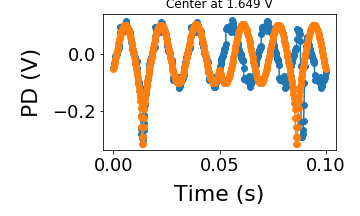

<IPython.core.display.Javascript object>


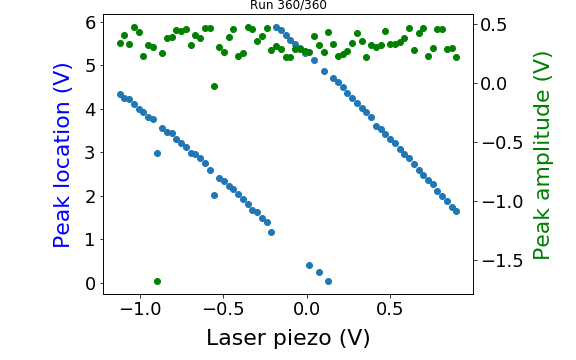

<IPython.core.display.Javascript object>


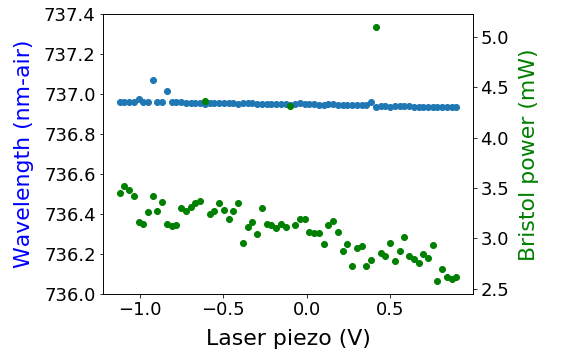

<IPython.core.display.Javascript object>


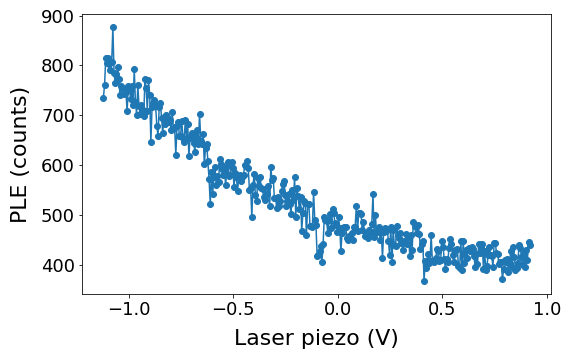

Initialization time (s) = 0.527


<IPython.core.display.Javascript object>


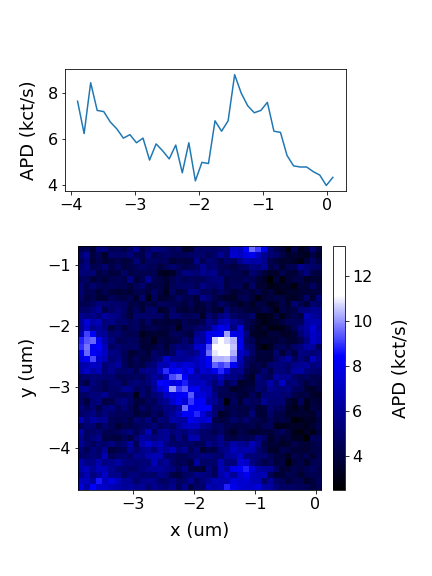

<IPython.core.display.Javascript object>


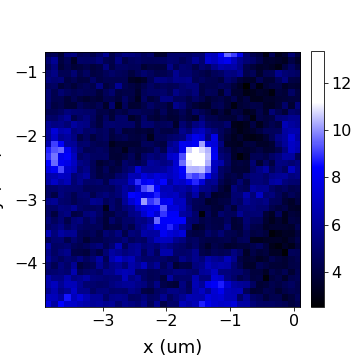

C:\data\200210\FSM-2D\FSM-2D_095013 Z.txt
0.4 0.1


<IPython.core.display.Javascript object>


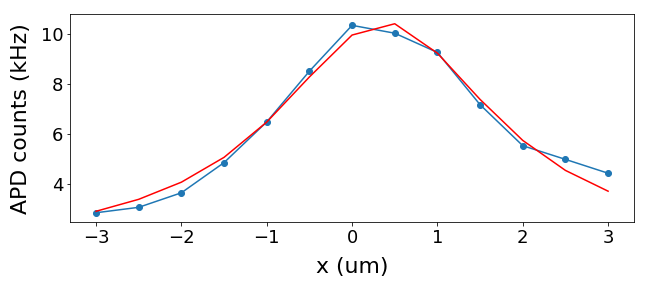

Optimized from fit
Amplitude is 9.24032050404765
Center is 0.38019403862604095
FWHM is 7.435160 um
Background is 1.2405598432939962
Position before scan:  -4.48495
Position after scan:  -4.483385


<IPython.core.display.Javascript object>


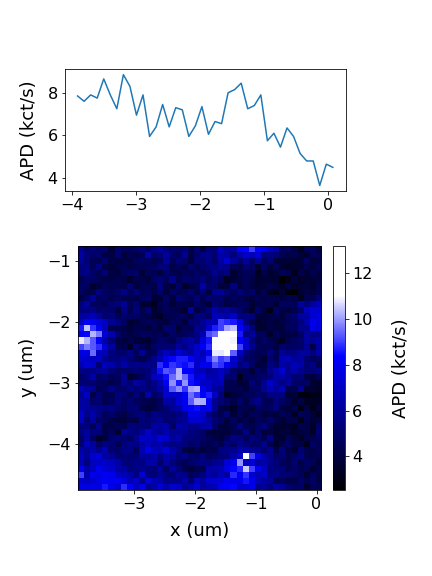

<IPython.core.display.Javascript object>


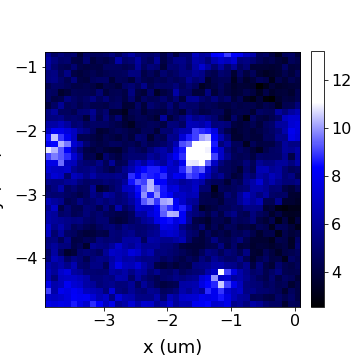

C:\data\200210\FSM-2D\FSM-2D_095316 Z.txt
0.4 0.30000000000000004


<IPython.core.display.Javascript object>


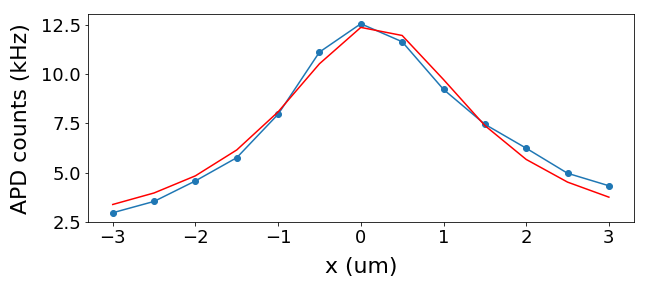

Optimized from fit
Amplitude is 10.942785517522534
Center is 0.16960401147176207
FWHM is 6.680215 um
Background is 1.568559980937415
Position before scan:  -4.484565
Position after scan:  -4.48451


<IPython.core.display.Javascript object>


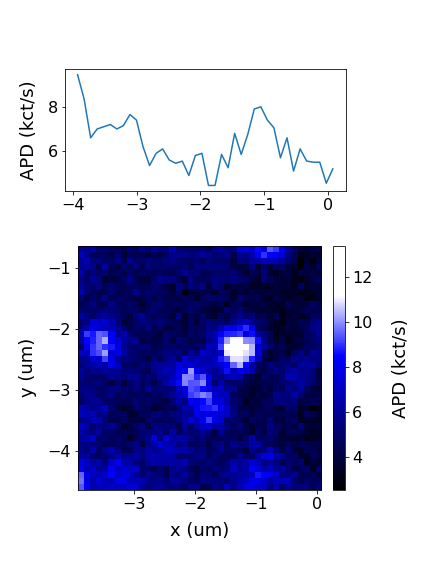

<IPython.core.display.Javascript object>


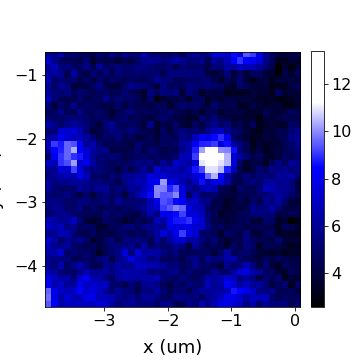

C:\data\200210\FSM-2D\FSM-2D_095621 Z.txt
0.7000000000000001 0.2


<IPython.core.display.Javascript object>


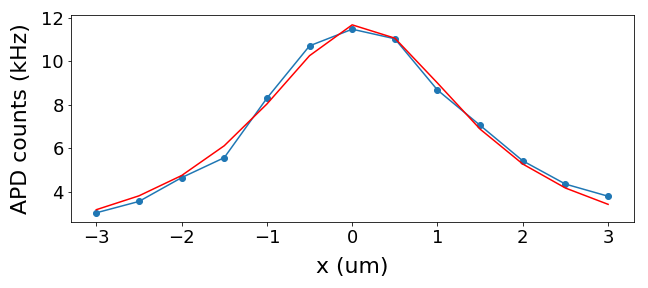

Optimized from fit
Amplitude is 10.578874831998451
Center is 0.10804551082243881
FWHM is 7.123061 um
Background is 1.1510216202790735
Position before scan:  -4.484395
Position after scan:  -4.48321


<IPython.core.display.Javascript object>


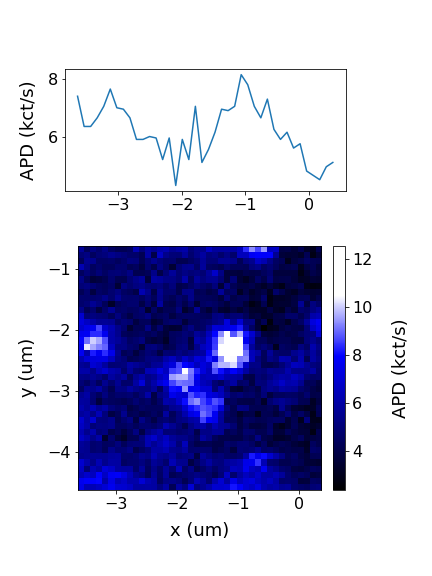

<IPython.core.display.Javascript object>


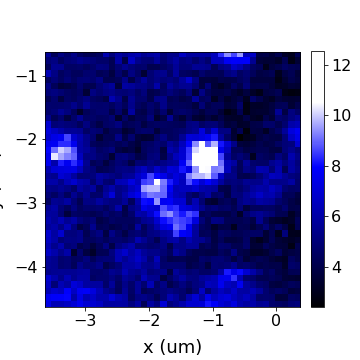

C:\data\200210\FSM-2D\FSM-2D_095931 Z.txt
0.5 0.2


<IPython.core.display.Javascript object>


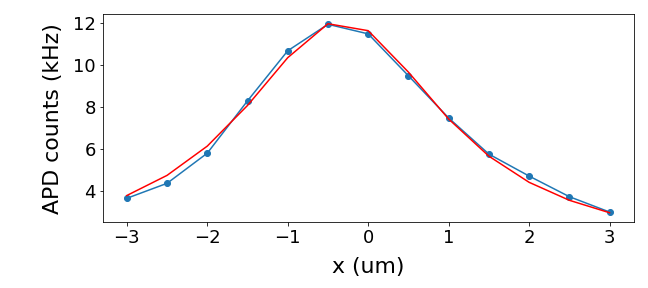

Optimized from fit
Amplitude is 11.134600530376513
Center is -0.3260439759411797
FWHM is 7.350135 um
Background is 0.9616391636105832
Position before scan:  -4.484285
Position after scan:  -4.484745
C:\data\200210\PLEScan\PLEScan_095948.txt
Total run time (s) = 741.753


In [58]:
# scan laser frequency in discrete steps
# software timed
time_start = time.time()

voltage = np.linspace(-1.122,0.918,360)
FP_FSR_V =4.783

lpFP = LivePlot(1, 2, 5, 3, 'o', 'Time (s)',"PD (V)")
lpLRFP = LivePlotLR(1, 1, 8, 5, 'o', 'Laser piezo (V)', 'Peak location (V)','Peak amplitude (V)')
lpLR = LivePlotLR(1, 1, 8, 5, 'o', 'Laser piezo (V)', 'Wavelength (nm-air)','Bristol power (mW)')
lpPLE = LivePlot(1, 2, 8, 5, 'o', 'Laser piezo (V)',"PLE (counts)")

lpPLENorm = LivePlot(1, 2, 8, 5, 'o', 'Laser piezo (V)',"PLE Normalized(counts/optical power)")

volt_so_far=[]
powerlist=[]
lambdalist=[]

FPlambda=[]
FPpower=[]

PLElist=[]
PLENormlist = [] # normalized by Toptica power

topticapower=[]

# initialize DG645
DG645_init()
DG_trig_write(False) # initialize trigger to a low state

bkg_count_rate = 330 # Cts/sec
bkg_count = bkg_count_rate*PLE_time/cycle_time*time_per_point 

intialization_time = time.time()-time_start
print(f'Initialization time (s) = {intialization_time:.3f}')

time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')
time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(True)
time.sleep(0.1) # wait for a short time
        
center_NV = True
center_per_N_run = 90 # center NV every N runs
check_wavelength_per_N_run = 5 # do FP scan every 4 runs


# incremental save

save_data = True
if save_data:
    data_type = 'PLEScan'
    data_header=f"""time_per_point = {time_per_point} # sec 
    init_time = {init_time} # 637 nm, sec
    PLE_time = {PLE_time} # 737 nm, sec
    delay637 = {delay637}
    delay737 = {delay737}
    delay532 = {delay532}
    marginFront = {marginFront} # allow the excitation laser to truely turn off, let the defect decays to its ground state
    marginBack = {marginBack} # some margin at the back to avoid the initialization laser turning on in the PLE time
    current (mA, at 0V) =  61
    pot reading = 75
    piezo control (V) PLE (counts) wavelength(nm-air) power(mW) FP lambda (V) FP power (V) PLENormlist (counts/optical power)
    """    
    data_array = np.array([volt_so_far,PLElist, lambdalist,powerlist,FPlambda,FPpower,PLENormlist]).T
    fname = data_save(data_array, None, data_type, data_header)#lpPLE.fig
    f = open(fname+".txt","a")

while True:
    try:
        print(time.time())
        time.sleep(1)
        f.write(f'{time.time()} {time.time()*2} {time.time()-1231}\n')
    except:
        f.close() 
        break
        
        


# liveplot readings so far
for ind,v in enumerate(voltage):
    try:
        tstart_loop=time.time()
        toptica_bounded_write(v) # task_toptica.write(v, auto_start=True, timeout=5)
        volt_so_far.append(v)
        # initialize counter
        PLE_APD = CI(APD_terminal,APD_ctr)
        PLE_APD.start()

        # output high on a digital channel, which is connected to the DG645 trigger input
        # this set up the pulse sequence
        DG_trig_write_pulse()
        
        # start time
        t_meas_start = time.time()
        
        # measure Bristol wavelength, Fabry-Perot peak, power monitor after beam splitter
        # keep in mind that the 737 nm laser is pulsing with a cycle time of a few us and a duty cycle 70+%
        if  (ind % check_wavelength_per_N_run == 0):
            # read power from photodiode        
            # ... analog channel
            currTopPower = 1
            currTopPower = read_Toptica_power()
            topticapower.append(currTopPower)
            
            # read wavemeter
            tstart_bristol = time.time()
            currentLambda,currentPower = bristol.readBristol() 
            lambdalist.append(currentLambda)
            powerlist.append(currentPower)

            ttot_bristol = time.time()-tstart_bristol
            
            # read fabry perot - need to start the read and write channel at the same time
            tstart_FP = time.time()
            t0_this,v_ao_scan_this,aiV_this = FP_scan()
            tscan_FP = time.time()-tstart_FP

            ts1 = time.time()
            best_vals = FP_fit(t0_this,v_ao_scan_this, aiV_this)
            tfit_FP = time.time() - ts1

            if ind==0:
                FPlambda.append(best_vals[1])
                last_value = best_vals[1]
            else:
                FPlambda.append(unwrap_by_pt(best_vals[1],last_value,FP_FSR_V))
                last_value = best_vals[1]
            FPpower.append(-best_vals[0])

            yfit = lorentziansin(v_ao_scan_this, best_vals[0], best_vals[1],best_vals[2],best_vals[3],best_vals[4],best_vals[5],best_vals[6])
            lpFP.plot_live(t0_this,aiV_this,yfit)
            lpFP.ax1.set_title(f'Center at {best_vals[1]:.3f} V')
            lpFP.fig.canvas.draw()
            plt.tight_layout()            

            ttot_FP = time.time()-tstart_FP
        else:
            FPlambda.append(np.nan)
            FPpower.append(np.nan)
            lambdalist.append(np.nan)
            powerlist.append(np.nan)  
        
        lpLRFP.plot_live(volt_so_far, FPlambda,FPpower)
        lpLRFP.ax1.set_title(f'Run {ind+1}/{len(voltage)}')
        lpLRFP.fig.canvas.draw()
        plt.tight_layout()
        
        lpLR.plot_live(volt_so_far, lambdalist,powerlist)
        lpLR.ax1.set_ylim([736,737.4]) # harwire limit
        
        t_meas_elapse = time.time() - t_meas_start
        # wait till the burst is done
        time.sleep(   max(0,time_per_point-t_meas_elapse)

        # read counts
        
        APD_count = PLE_APD.read_counts()
                   

        PLE_APD.close()
        PLElist.append(APD_count)
        PLENormlist.append((APD_count-bkg_count)/topticapower[-1]) # divided by the last Toptica reading           
       
       
        lpPLE.plot_live(volt_so_far,PLElist)
        lpPLENorm.plot_live(volt_so_far,PLENormlist)
        if save_data:
            f.write(f'{volt_so_far[-1],PLElist[-1], lambdalist[-1],powerlist[-1],FPlambda[-1],FPpower[-1],PLENormlist[-1]}\n')
                   
                   
                   
                   

        # re-center NV every few cycles
        if center_NV and (ind % center_per_N_run == center_per_N_run-1):
            DG645_set_polarity(BNC_532,1)
            DG645_set_polarity(BNC_637,1)
            DG645_set_polarity(BNC_737,1)
            time.sleep(0.1) # wait for a short time 
            shutter_ctrl_write(False)
            time.sleep(0.1) # wait for a short time
            efw_instance.change_filter('750SP')
            while True:
                if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750SP']:
                    break
                else:
                    efw_instance.change_filter('750SP')
            DG645_set_polarity(BNC_532,0)
            DG645_set_polarity(BNC_637,0)
            
#             time.sleep(0.5)
            # track NV
            FSM1.track_NV_2D(templateC,4,4,scan_rate=50)
            time.sleep(1)
            obj_stage.center_NV_depth(scan_extent=3,step_size=0.5)

            # track NV
#             time.sleep(2)

            # reverse
            # configure system back to PLE measurement
            DG645_set_polarity(BNC_532,1)
            DG645_set_polarity(BNC_637,1)
            efw_instance.change_filter('750LP')
            while True:
                if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
                    break
                else:
                    efw_instance.change_filter('750LP')
            time.sleep(0.1) # wait for a short time 
            shutter_ctrl_write(True)
            time.sleep(0.1) # wait for a short time 
            # to be sure, initialize DG645
            DG645_init()
            DG_trig_write(False)
            time.sleep(0.5)

        # incremental save data to file

        t_loop = time.time()-tstart_loop
#         print(f'Loop {ind} time (s) = {t_loop}, FP scan time (s) = {tscan_FP}, FP fit time (s) = {tfit_FP}, FP time (s) = {ttot_FP}, Bristol time (s) = {ttot_bristol}')
    except:
        PLE_APD.close()
        # close shutter
        time.sleep(0.1)
        shutter_ctrl_write(False)
        time.sleep(0.2)
        
        # wait till the current burst cycle is done
        time.sleep(time_per_point)
        
        # default OFF state
        DG645_set_polarity(BNC_532,1)
        DG645_set_polarity(BNC_637,1)
        DG645_set_polarity(BNC_737,1)
        
        # switch filter to 750 LP
        efw_instance.change_filter('750LP')
        while True:
            if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
                break
            else:
                efw_instance.change_filter('750LP')

# fit to a lorentzian
best_vals = lor_bkg_fit(volt_so_far,PLENormlist)
yfit = lorentzian_bkg_func(volt_so_far, best_vals[0], best_vals[1],best_vals[2],best_vals[3])
print(f'Amplitude, center, FWHM, background {best_vals[0]:.3f}, {best_vals[1]:.3f}, {best_vals[2]:.3f}, {best_vals[3]:.3f}'  )
lpPLENorm.ax1.plot(volt_so_far,yfit)
                   

# chi square
ychisq = lor_bkg_least_sq(volt_so_far,PLENormlist)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(volt_so_far,PLENormlist)

                   
                   
                   
                   
                   
toptica_bounded_write(0)
DG645_default()

time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time 
if save_data:
    f.close() 
                   
                           
# if save_data:
#     data_type = 'PLEScan'
#     data_header=f"""time_per_point = {time_per_point} # sec 
#     init_time = {init_time} # 637 nm, sec
#     PLE_time = {PLE_time} # 737 nm, sec
#     delay637 = {delay637}
#     delay737 = {delay737}
#     delay532 = {delay532}
#     marginFront = {marginFront} # allow the excitation laser to truely turn off, let the defect decays to its ground state
#     marginBack = {marginBack} # some margin at the back to avoid the initialization laser turning on in the PLE time
#     current (mA, at 0V) =  61
#     pot reading = 75
#     piezo control (V) PLE (counts) wavelength(nm-air) power(mW) FP lambda (V) FP power (V) PLENormlist (counts/optical power)
#     """    
#     data_array = np.array([volt_so_far,PLElist, lambdalist,powerlist,FPlambda,FPpower,PLENormlist]).T
#     data_save(data_array, lpPLE.fig, data_type, data_header)

time_total = time.time()-time_start
print(f'Total run time (s) = {time_total:.3f}')

In [57]:
bristol.readBristol()

(0.0, 0.0)

In [56]:
data_array

array([list([-5.0, -2.5, 0.0, 2.5, 5.0]),
       list([551.0, 562.0, 552.0, 498.0, 591.0]), list([]), list([]),
       list([2.341767298392434, 2.58501347832677, 4.8298814455375725, 3.18198962568275, 1.0508861080601333]),
       list([0.47690059589861045, 0.014219802926702801, 44.42532580316124, 0.01362786868424793, -0.029226782971738217])],
      dtype=object)

# Timing

In [478]:
# ~ 0.64 sec for FP scan, read wavemeter, and updating graphs

In [55]:
tstart = time.time()
readBristol(bristol521handle)
print(time.time()-tstart)

0.20101165771484375


In [60]:
# 50 ms to query Bristol wavelength meter
# 100 ms in total for both wavelength and power
tstart = time.time()
CLGetLambdaReading(bristol521handle)
# CLGetPowerReading(bristol521handle)
print(time.time()-tstart)

0.05100297927856445


In [57]:
# Hardware timed 
# construct a list of voltages to write
# generate an on board clock with the rate desired

In [79]:
# 20 - 40 ms to update DG645 polarity (with open channel, write, and close channel)
tstart = time.time()
DG645_737_polarity(1)
print(time.time()-tstart)

0.022001266479492188


In [87]:
# 1 ms to write to DG645
dg_source = DG645(DG645_address)
tstart = time.time()
dg_source.set_polarity(BNC_737,1)  
print(time.time()-tstart)
dg_source.close()

0.0010001659393310547


In [89]:
# 4 ms to write to toptica
tstart = time.time()
toptica_bounded_write(v)
print(time.time()-tstart)

0.004000186920166016


In [12]:
# set instruments back to default state and close communication channels
# task_toptica.write(0)
# task_toptica.close()
# dg_source.close()